In [305]:
import os
import numpy as np
import os, glob

In [306]:
import librosa

In [307]:
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=22050, mono=True, offset=0.0, duration=None)
    return y, sr
    

In [308]:
audio_path = path = "audio/bulldozer_wav"
sample_rate = 44100
duration = 2
samples = sample_rate * duration

In [309]:
# For single Folder Folder
def read_audio_files(path, sample_rate):
    audio_values = []
    files = os.listdir(path)
    for item in files:
        if item.endswith('.wav'):
            files = os.path.join(path, item)
            y, sr = librosa.load(files, sr=sample_rate)
            audio_values.append(y)
            
    return np.array(audio_values), sr

In [310]:
# For Multiple Folder Folder
def read_audio_files_subdir(path, sample_rate):
    filelist = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.wav'):
                all_file = os.path.join(root,file)
                y, sr = librosa.load(all_file, sr=sample_rate)
                filelist.append(y)
    
    return np.array(filelist), sr

In [311]:
path = "audio/"
audio, sampling_rate = read_audio_files_subdir(path, 16000)

In [312]:
# Extract mfcc
def create_mfcc(y):
    return librosa.feature.mfcc(y=y, sr=22050, S=None, n_mfcc=30)

In [319]:
mfcc = create_mfcc(audio)
print(mfcc.shape)
print(mfcc[19].shape)

(20, 30, 156)
(30, 156)


In [314]:
print(mfcc[19][0])
print(mfcc[19][0].shape)

[-496.75577  -272.6402   -180.29309  -157.21472  -170.48918  -182.7405
 -187.63055  -182.75954  -180.28935  -181.43127  -184.74638  -182.1943
 -182.76953  -192.15315  -190.2188   -180.55344  -176.47873  -179.17839
 -178.59111  -177.63327  -178.7582   -176.42235  -176.80475  -180.5978
 -178.1551   -178.49182  -173.07767  -171.76611  -172.10072  -177.24728
 -182.94795  -178.49168  -171.74533  -174.03107  -179.5255   -172.87592
 -171.50314  -168.87572  -170.64427  -173.3869   -168.29396  -169.13075
 -172.59236  -167.99852  -159.16656  -162.46593  -165.74681  -168.97691
 -175.77112  -177.50198  -172.69102  -176.06848  -169.47406  -164.35156
 -167.73491  -169.53394  -175.83212  -156.90454    -8.139269   50.710625
   40.247578    9.360758  -32.18745   -71.69409  -100.6138   -125.0923
 -138.30162  -136.64212  -136.63951  -131.77756  -130.82378  -134.0589
 -137.2807   -144.4055   -145.67897  -140.46825  -134.74236  -102.70437
  -97.37609  -112.46548  -123.46148  -136.21451  -148.88876  -150.22

In [315]:
import matplotlib.pyplot as plt

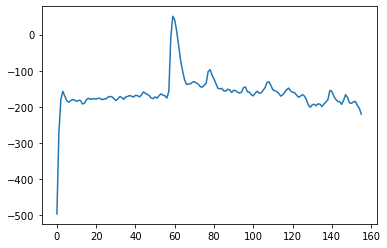

In [316]:
plt.plot(mfcc[19][0])

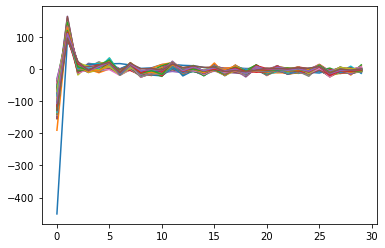

In [317]:
plt.plot(mfcc[0])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

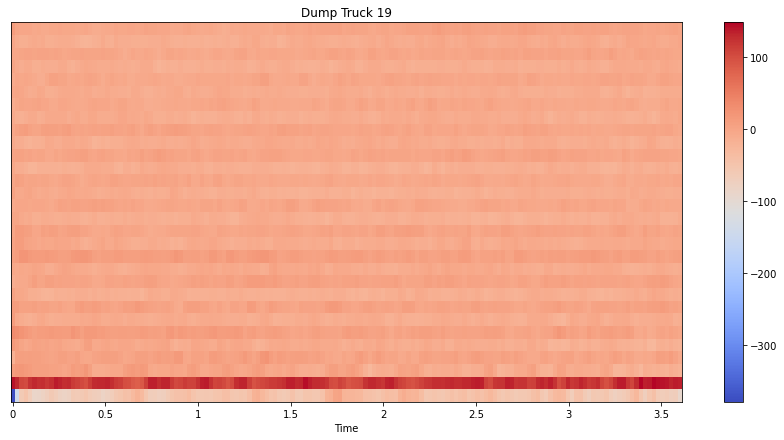

In [325]:
import librosa.display

plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc[1], x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.title('Dump Truck 19')
plt.show

# Features and labels

In [409]:
labels = ['Bulldozer_wav', 'Dump_truck']

In [410]:
import os
import pandas as pd
audio_path = "audio/"
classes = os.listdir(path)
print(classes)

['bulldozer_wav', 'dump_truck_wav']


In [411]:
audio_list = []
labels = []
for label in classes:
    for wav_file in os.listdir(audio_path+label):
        audio_list.append(audio_path+label+'/'+wav_file)
        labels.append(label)

df = pd.DataFrame({'audio_files': audio_list, 'Label': labels})
print(df.head())
    

                                  audio_files          Label
0  audio/bulldozer_wav/bulldozer_5sec_001.wav  bulldozer_wav
1  audio/bulldozer_wav/bulldozer_5sec_002.wav  bulldozer_wav
2  audio/bulldozer_wav/bulldozer_5sec_003.wav  bulldozer_wav
3  audio/bulldozer_wav/bulldozer_5sec_004.wav  bulldozer_wav
4  audio/bulldozer_wav/bulldozer_5sec_005.wav  bulldozer_wav


In [416]:
def audio_dataset(path, sample_rate):
    audio_list = []
    audio_values = []
    labels = []
    
    classes = os.listdir(path)
    
    for label in classes:
        for wav_file in os.listdir(path+label):
            if wav_file.endswith('.wav'):
                audio_files = audio_path+label+'/'+wav_file
                audio_list.append(audio_files)
                y, sr = librosa.load(audio_files, sr=sample_rate)
                audio_values.append(y)
                labels.append(label)
                
    return np.array(audio_list), np.array(audio_values), np.array(labels), sr
    

In [527]:
files, values, labels, sr= audio_dataset(path, 20000)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)

Label Encoder: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [529]:
print(files.shape)
print(labels.shape)
print(values.shape)
print ("Label Encoder:" ,integer_encoded)
print(sr)

(20,)
(20,)
(20, 99266)
Label Encoder: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
20000


In [530]:
import numpy as np
from sklearn.model_selection import train_test_split

In [533]:
X_train, X_test, y_train, y_test = train_test_split(values, integer_encoded, test_size=0.2, random_state=42, shuffle=True)

In [536]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16, 99266)
(16,)
(4, 99266)
(4,)


In [526]:
dataset1 = dict(zip(values, labels))
print(dataset1)

TypeError: unhashable type: 'numpy.ndarray'

In [447]:
from sklearn.preprocessing import LabelBinarizer
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
print ("Label Encoder:" ,integer_encoded)

Label Encoder: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [452]:
df = pd.DataFrame({'audio_files': files, 'equipment': labels, 'labels': integer_encoded})
df.head(20)

,audio_files,equipment,labels
0,audio/bulldozer_wav/bulldozer_5sec_001.wav,bulldozer_wav,0
1,audio/bulldozer_wav/bulldozer_5sec_002.wav,bulldozer_wav,0
2,audio/bulldozer_wav/bulldozer_5sec_003.wav,bulldozer_wav,0
3,audio/bulldozer_wav/bulldozer_5sec_004.wav,bulldozer_wav,0
4,audio/bulldozer_wav/bulldozer_5sec_005.wav,bulldozer_wav,0
5,audio/bulldozer_wav/bulldozer_5sec_006.wav,bulldozer_wav,0
6,audio/bulldozer_wav/bulldozer_5sec_007.wav,bulldozer_wav,0
7,audio/bulldozer_wav/bulldozer_5sec_008.wav,bulldozer_wav,0
8,audio/bulldozer_wav/bulldozer_5sec_009.wav,bulldozer_wav,0
9,audio/bulldozer_wav/bulldozer_5sec_010.wav,bulldozer_wav,0


# Scikit-learn's LabelBinarizer vs. OneHotEncoder

In [434]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

In [444]:
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 
'warm', 'hot']
values = array(data)
print(f"Type: {type(data)}")
print(f"Type: {type(values)}")
print(f"Domension: {values.ndim}")

Type: <class 'list'>
Type: <class 'numpy.ndarray'>
Domension: 1


### integer encode

In [446]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print ("Label Encoder:" ,integer_encoded)

Label Encoder: [0 0 2 0 1 1 2 0 2 1]


In [454]:
# onehot encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print ("OneHot Encoder:", onehot_encoded)

OneHot Encoder: [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [458]:
#Binary encode
lb = LabelBinarizer()
print ("Label Binarizer:", lb.fit_transform(values))

Label Binarizer: [[1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


# Audio Data Mixing

In [459]:
files, values, labels, sr= audio_dataset(path, 20000)

In [482]:
mixed1 = 0.3*(values[0]+values[10])
print(values[0].shape)
print(values[10].shape)
print(mixed1.shape)

(99266,)
(99266,)
(99266,)


Text(0.5, 1.0, 'bulldozer1')

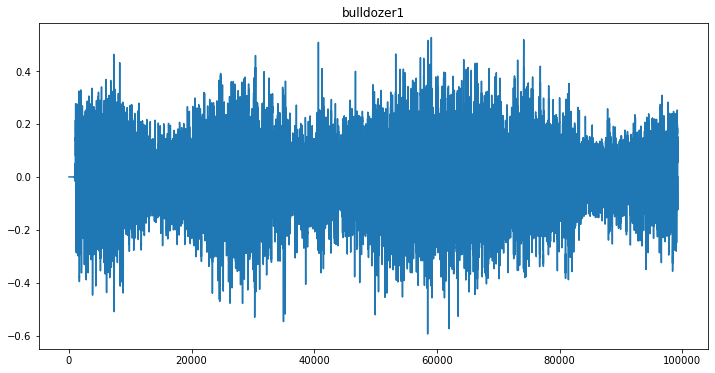

In [487]:
# Plot first and 11
import librosa.display

plt.figure(figsize=(12, 6))
plt.plot(values[0])
plt.title('bulldozer1')

Text(0.5, 1.0, 'dump_truck1')

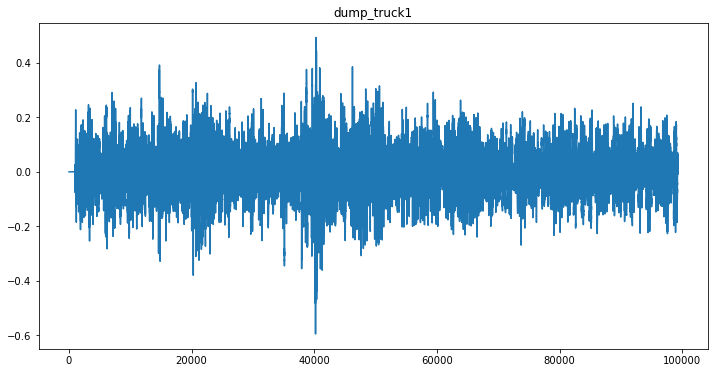

In [488]:
plt.figure(figsize=(12, 6))
plt.plot(values[10])
plt.title('dump_truck1')

Text(0.5, 1.0, 'mixed1')

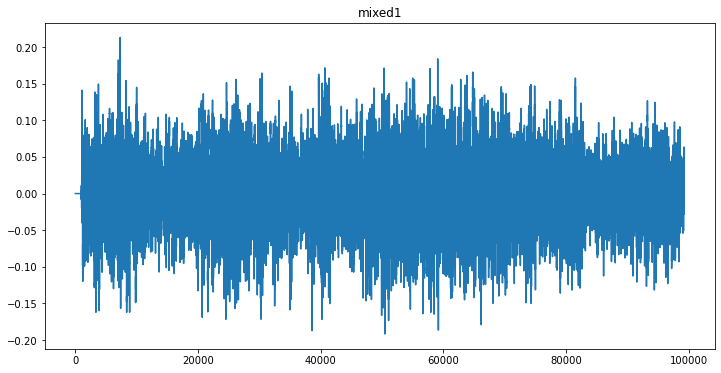

In [489]:
plt.figure(figsize=(12, 6))
plt.plot(mixed1)
plt.title('mixed1')

In [507]:
dataset = list(zip(values, labels))
print(dataset[0])

(array([1.        , 1.        , 1.        , ..., 0.88359046, 0.87552255,
       1.        ], dtype=float32), 'v')


In [506]:
for feature, label in zip(values, labels):
    X = list(features)
    y = list(label)
    print(X)

[]


[]
